# **Step 1: Load and Explore the Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**# Load datasets**

In [2]:
customers = pd.read_csv('/Customers.csv')

In [3]:
products = pd.read_csv('/Products.csv')

In [4]:
transactions = pd.read_csv('/Transactions.csv')


**# Display basic info**

In [5]:
print("Customers Data Info:")
print(customers.info())
print("\nProducts Data Info:")
print(products.info())
print("\nTransactions Data Info:")
print(transactions.info())


Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

**# Preview data**

In [6]:
print("\nCustomers Data Preview:")
print(customers.head())
print("\nProducts Data Preview:")
print(products.head())
print("\nTransactions Data Preview:")
print(transactions.head())


Customers Data Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2 

**# Check for missing values**

In [7]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**# Handle duplicates**

In [8]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


**# Convert dates to datetime format**

In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

**# Region distribution**


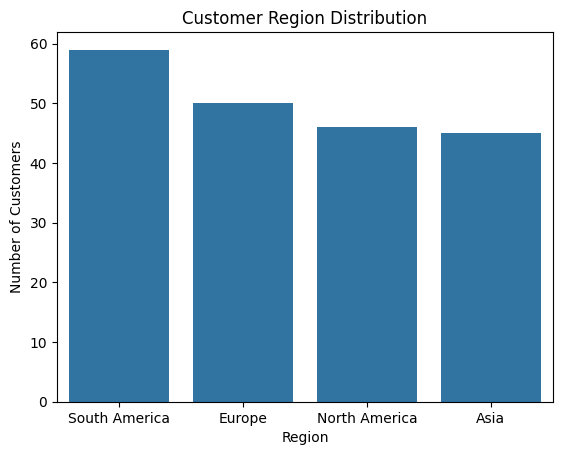

In [10]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Region Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.show()

**# Top 5 most sold products**

In [11]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(5)
top_products_names = top_products.reset_index().merge(products, on='ProductID')[['ProductName', 'Quantity']]
print("\nTop 5 Most Sold Products:")
print(top_products_names)


Top 5 Most Sold Products:
             ProductName  Quantity
0     SoundWave Cookbook        46
1        SoundWave Jeans        46
2     TechPro Headphones        45
3       TechPro Cookbook        43
4  ActiveWear Smartphone        43


**# Revenue trends over time**

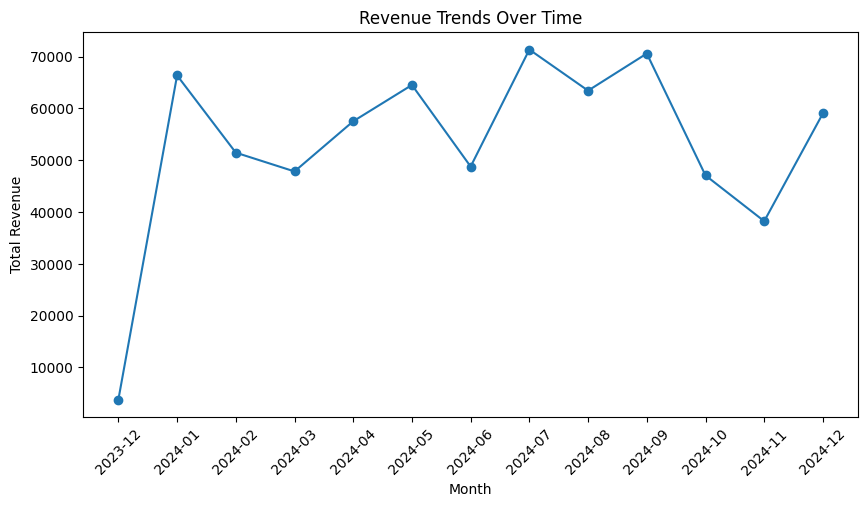

In [12]:
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
revenue_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
plt.plot(revenue_trends.index.astype(str), revenue_trends.values, marker='o')
plt.title('Revenue Trends Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


**# Revenue by region**

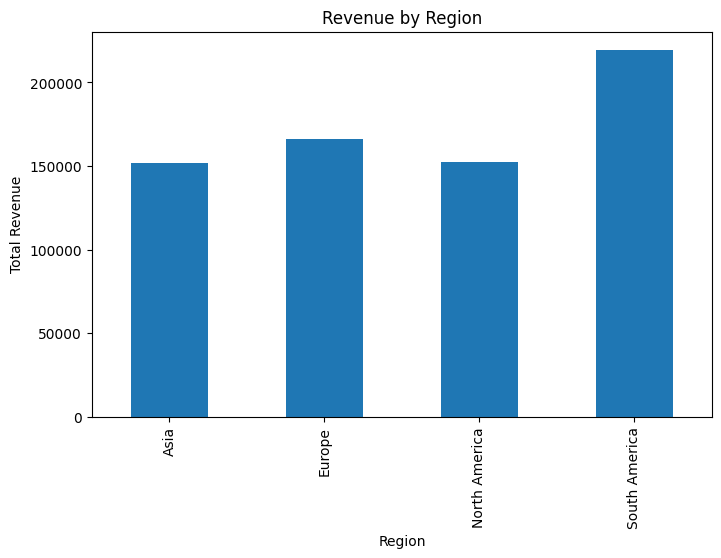

In [13]:
revenue_by_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
revenue_by_region.plot(kind='bar', title='Revenue by Region', figsize=(8, 5))
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.show()